# Sentiment Analysis using Logistic Regression
Link: https://drive.google.com/drive/folders/1zKTc2r2Dp-cOVKOQ0K0h3Ug2AbgIKA9a?usp=drive_link

## 1. Introduction
In this demo, we will perform **Sentiment Analysis** — a fundamental NLP task that determines whether a given text expresses a positive or negative opinion.
We will use:
- **Dataset:** NLTK `movie_reviews` (2000 movie reviews)
- **Algorithm:** Logistic Regression
- **Feature Representation:** TF-IDF (Term Frequency–Inverse Document Frequency)

## 2. Import Libraries

In [1]:
import nltk
import random
import pandas as pd
import numpy as np
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
nltk.data.path.append("./data")
print(len(movie_reviews.fileids()))

2000


## 3. Load and Inspect Dataset
We use the **NLTK movie_reviews corpus**, which contains 2,000 labeled movie reviews.
Each review is labeled as either `"pos"` (positive) or `"neg"` (negative).
We will convert them into a Pandas DataFrame for easier handling.


In [15]:
# Load movie reviews and labels
texts = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]

# Create a dataframe
df = pd.DataFrame({'review': texts, 'label': labels})
print("Dataset size:", len(df))
df.head()

Dataset size: 2000


,review,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


## 4. Split Data into Training and Test Sets
We shuffle the dataset and split it into **80% training** and **20% testing** subsets.
This allows us to train the model on one part of the data and evaluate it on unseen reviews.


In [16]:
# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['label'], test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 1600, Test samples: 400


## 5. Feature Extraction using TF-IDF
We use **TF-IDF (Term Frequency–Inverse Document Frequency)** to convert text into numerical features.
This method gives higher weight to words that are important for identifying sentiment, while reducing the influence of common words.


In [17]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Feature matrix shape:", X_train_tfidf.shape)

Feature matrix shape: (1600, 5000)


## 6. Train Logistic Regression Model
We train a **Logistic Regression** model, a linear classifier that predicts the probability of each sentiment label.
It is efficient, interpretable, and often performs well on text data.


In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

/Users/luna/Academic/2025 Spring/41040 Introduction to Artificial Intelligence/Lab/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/luna/Academic/2025 Spring/41040 Introduction to Artificial Intelligence/Lab/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/luna/Academic/2025 Spring/41040 Introduction to Artificial Intelligence/Lab/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: invalid value encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)


## 7. Evaluate Model Performance
We assess the model’s performance using **accuracy** and **classification report** metrics.
This tells us how well the model distinguishes between positive and negative reviews.

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.855

Classification Report:
               precision    recall  f1-score   support

         neg       0.84      0.87      0.86       197
         pos       0.87      0.84      0.85       203

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.85       400
weighted avg       0.86      0.85      0.85       400



## 8. Visualize Confusion Matrix
The confusion matrix helps us see how many positive and negative reviews were correctly or incorrectly classified.

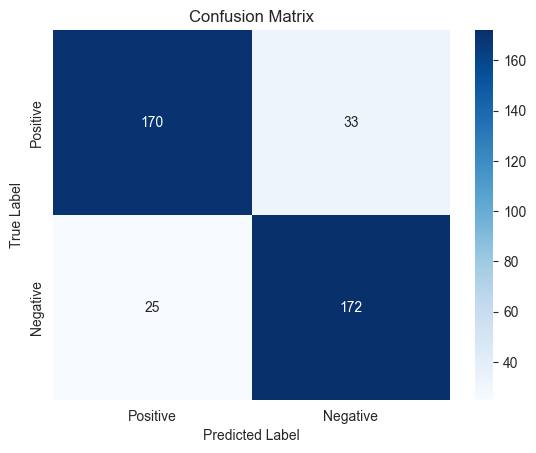

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=['pos', 'neg'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 9. Try Example Predictions
We now test the trained model on custom input sentences to see how it performs on new data.

In [21]:
examples = [
    "I absolutely loved this movie! The story and acting were brilliant.",
    "What a terrible film. I wasted two hours of my life.",
    "Not bad, but the ending was disappointing.",
    "A masterpiece of modern cinema!"
]

X_examples = vectorizer.transform(examples)
predictions = model.predict(X_examples)

for text, pred in zip(examples, predictions):
    print(f"\nText: {text}\nPredicted Sentiment: {pred}")


Text: I absolutely loved this movie! The story and acting were brilliant.
Predicted Sentiment: pos

Text: What a terrible film. I wasted two hours of my life.
Predicted Sentiment: neg

Text: Not bad, but the ending was disappointing.
Predicted Sentiment: neg

Text: A masterpiece of modern cinema!
Predicted Sentiment: pos


## 10. Conclusion
- Logistic Regression performs well on high-dimensional, sparse text data.
- Positive words (e.g., *love*, *great*, *amazing*) push predictions toward the **positive** class.
- Negative words (e.g., *boring*, *terrible*, *waste*) push predictions toward the **negative** class.
- Although simple, this model provides a solid baseline for sentiment analysis.